# 🧩 EDA Parte 1 — Estructural
### *Análisis Exploratorio de Datos Hospitalarios (2005–2023)*

---


# 🧩 Etapa 1 — Carga inicial del dataset


In [ ]:
# Cargar librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Configuración estética
plt.style.use("seaborn-v0_8-whitegrid")
sns.set_palette("crest")

# Ruta del archivo
base_path = os.getcwd()
file_name = "dataset_hospitalario_estacional_mensual_limpio.csv"
file_path = os.path.join(base_path, file_name)

# Cargar dataset limpio
df = pd.read_csv("dataset_hospitalario_estacional_mensual_limpio.csv")



In [ ]:
# Exploración básica
print("🔹 Dimensiones del dataset:", df.shape)
print("\n🔹 Tipos de datos:\n")
df.info()

🔹 Dimensiones del dataset: (495310, 31)

🔹 Tipos de datos:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 495310 entries, 0 to 495309
Data columns (total 31 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   anio                          495310 non-null  int64  
 1   region_sanitaria              495310 non-null  object 
 2   municipio_id                  495310 non-null  int64  
 3   municipio_nombre              495310 non-null  object 
 4   establecimiento_nombre        495310 non-null  object 
 5   dependencia                   495310 non-null  object 
 6   consultas_odontologicas       495310 non-null  int64  
 7   consultas_medicas             495310 non-null  int64  
 8   consultas_paramedicas         495310 non-null  int64  
 9   interconsultas                495310 non-null  int64  
 10  egresos                       495310 non-null  int64  
 11  dias_camas_disponible         495310 non-nul

In [ ]:
# Vista preliminar
display(df.head(10))

,anio,region_sanitaria,municipio_id,municipio_nombre,establecimiento_nombre,dependencia,consultas_odontologicas,consultas_medicas,consultas_paramedicas,interconsultas,...,cirugias,quirofanos,medicos,enfermeros,inventario,covid_dummy,mes,clima,feriados,establecimiento_id
0,2005,I,60007,Adolfo Alsina,Hospital Local General José de San Martín,Municipal,385,4531,1133,0,...,14,1,14,22,6,0,1,calido,1,107
1,2005,I,60007,Adolfo Alsina,Hospital Local General José de San Martín,Municipal,385,4814,1133,0,...,15,1,14,23,6,0,2,calido,0,107
2,2005,I,60007,Adolfo Alsina,Hospital Local General José de San Martín,Municipal,514,7174,1511,0,...,27,1,20,30,8,0,3,templado,0,107
3,2005,I,60007,Adolfo Alsina,Hospital Local General José de San Martín,Municipal,578,8496,1700,0,...,33,1,24,36,10,0,4,templado,0,107
4,2005,I,60007,Adolfo Alsina,Hospital Local General José de San Martín,Municipal,578,8921,1700,0,...,34,1,24,36,10,0,5,templado,1,107
5,2005,I,60007,Adolfo Alsina,Hospital Local General José de San Martín,Municipal,642,10384,1889,0,...,36,1,26,40,11,0,6,frio,0,107
6,2005,I,60007,Adolfo Alsina,Hospital Local General José de San Martín,Municipal,642,10384,1889,0,...,23,1,22,36,10,0,7,frio,1,107
7,2005,I,60007,Adolfo Alsina,Hospital Local General José de San Martín,Municipal,578,8921,1700,0,...,30,1,23,34,9,0,8,frio,0,107
8,2005,I,60007,Adolfo Alsina,Hospital Local General José de San Martín,Municipal,514,7552,1511,0,...,28,1,21,32,8,0,9,templado,0,107
9,2005,I,60007,Adolfo Alsina,Hospital Local General José de San Martín,Municipal,514,7174,1511,0,...,30,1,21,32,8,0,10,templado,0,107



# 🧱 Etapa 2 — Estructura general


In [ ]:
# Cantidad de filas y columnas
filas, columnas = df.shape
print(f"📏 Filas: {filas} | Columnas: {columnas}")

📏 Filas: 495310 | Columnas: 31


In [ ]:
# Nulos por columna
nulos = df.isnull().sum().sort_values(ascending=False)
print("\n🔍 Columnas con valores nulos:")
display(nulos[nulos > 0])


🔍 Columnas con valores nulos:


,0


In [ ]:
# Duplicados
duplicados = df.duplicated().sum()
print(f"\n📋 Registros duplicados: {duplicados}")


📋 Registros duplicados: 0


In [ ]:
# Hospitales y municipios únicos
if 'establecimiento_id' in df.columns:
    print(f"\n🏥 Hospitales únicos: {df['establecimiento_id'].nunique()}")
if 'municipio_id' in df.columns:
    print(f"🏙️ Municipios únicos: {df['municipio_id'].nunique()}")



🏥 Hospitales únicos: 6525
🏙️ Municipios únicos: 270


In [ ]:
# Cobertura temporal por hospital
if 'anio' in df.columns and 'establecimiento_id' in df.columns:
    cobertura = df.groupby('establecimiento_id')['anio'].agg(['min', 'max']).reset_index()
    print("\n📆 Cobertura temporal (años mínimos y máximos por hospital):")
    display(cobertura.head(10))


📆 Cobertura temporal (años mínimos y máximos por hospital):


,establecimiento_id,min,max
0,1,2023,2023
1,2,2023,2023
2,3,2023,2023
3,4,2023,2023
4,5,2023,2023
5,6,2023,2023
6,7,2023,2023
7,8,2023,2023
8,9,2023,2023
9,10,2023,2023



# 🧹 Etapa 3 — Limpieza y validaciones básicas


In [ ]:
# Revisión de valores negativos en columnas numéricas
num_cols = df.select_dtypes(include=np.number).columns
negativos = (df[num_cols] < 0).sum()
print("🚫 Valores negativos por columna:")
display(negativos[negativos > 0])

# Verificar que porcentaje_ocupacion esté en rango [0, 100]
if 'porcentaje_ocupacion' in df.columns:
    fuera_rango = df[(df['porcentaje_ocupacion'] < 0) | (df['porcentaje_ocupacion'] > 100)]
    print(f"\n⚠️ Registros fuera de rango (porcentaje_ocupacion): {len(fuera_rango)}")
    # Corrección (si es necesario)
    df['porcentaje_ocupacion'] = df['porcentaje_ocupacion'].clip(0, 100)

# Coherencia: cirugías > 0 → quirófanos ≥ 1
if {'cirugias', 'quirofanos'}.issubset(df.columns):
    incoherentes_cir = df[(df['cirugias'] > 0) & (df['quirofanos'] < 1)]
    print(f"\n⚠️ Casos incoherentes (cirugías > 0 y quirófanos < 1): {len(incoherentes_cir)}")
    # Ajuste conservador
    df.loc[(df['cirugias'] > 0) & (df['quirofanos'] < 1), 'quirofanos'] = 1

# Coherencia: consultas_medicas = 0 → urgencias baja (<5)
if {'consultas_medicas', 'urgencias'}.issubset(df.columns):
    incoherentes_con = df[(df['consultas_medicas'] == 0) & (df['urgencias'] > 5)]
    print(f"\n⚠️ Casos incoherentes (consultas=0 y urgencias altas): {len(incoherentes_con)}")

# Eliminación de duplicados
df = df.drop_duplicates()
print("\n🧽 Duplicados eliminados. Nuevo tamaño:", df.shape)


🚫 Valores negativos por columna:


,0



⚠️ Registros fuera de rango (porcentaje_ocupacion): 0

⚠️ Casos incoherentes (cirugías > 0 y quirófanos < 1): 0

⚠️ Casos incoherentes (consultas=0 y urgencias altas): 0

🧽 Duplicados eliminados. Nuevo tamaño: (495310, 31)



# 📊 Etapa 4 — Análisis de distribución


In [ ]:
# Variables clave
vars_interes = ['consultas_medicas', 'egresos', 'porcentaje_ocupacion', 'cirugias']
vars_existentes = [v for v in vars_interes if v in df.columns]

# Estadísticas descriptivas
print("📈 Estadísticas descriptivas:")
display(df[vars_existentes].describe(percentiles=[.25, .5, .75]))

📈 Estadísticas descriptivas:


,consultas_medicas,egresos,porcentaje_ocupacion,cirugias
count,495310.000000,495310.000000,495310.000000,495310.000000
mean,2134.902092,38.288648,0.952499,6.997767
std,5452.410069,191.750353,2.363540,36.612084
min,0.000000,0.000000,0.000000,0.000000
25%,170.000000,0.000000,0.000000,0.000000
50%,597.000000,0.000000,0.000000,0.000000
75%,1870.000000,0.000000,0.000000,0.000000
max,325878.000000,9847.000000,71.606119,2497.000000


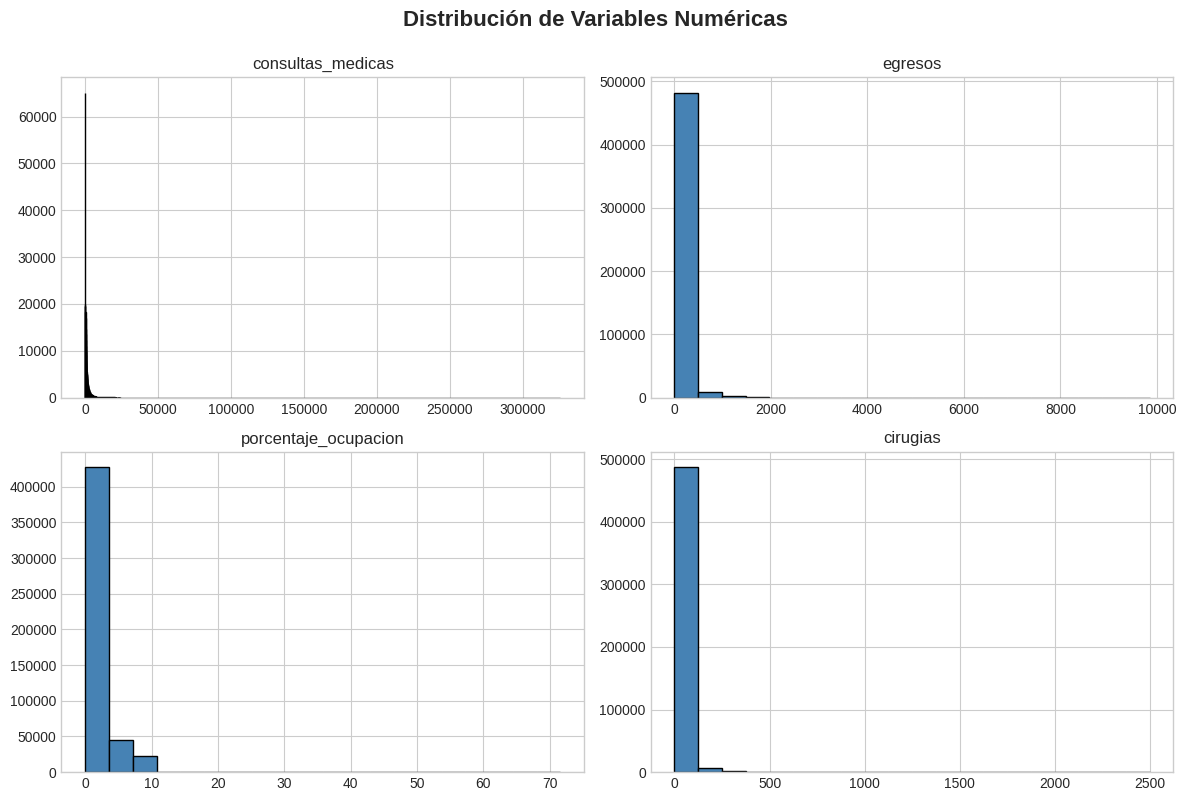

In [ ]:
# Histogramas
# vars_interes, vars_existentes: ya definidas

df[vars_existentes].hist(figsize=(12, 8), bins='auto', edgecolor='black', color='steelblue', layout=(2,2))

plt.suptitle('Distribución de Variables Numéricas', fontsize=16, fontweight='bold', y=0.995)
plt.tight_layout()
plt.show()

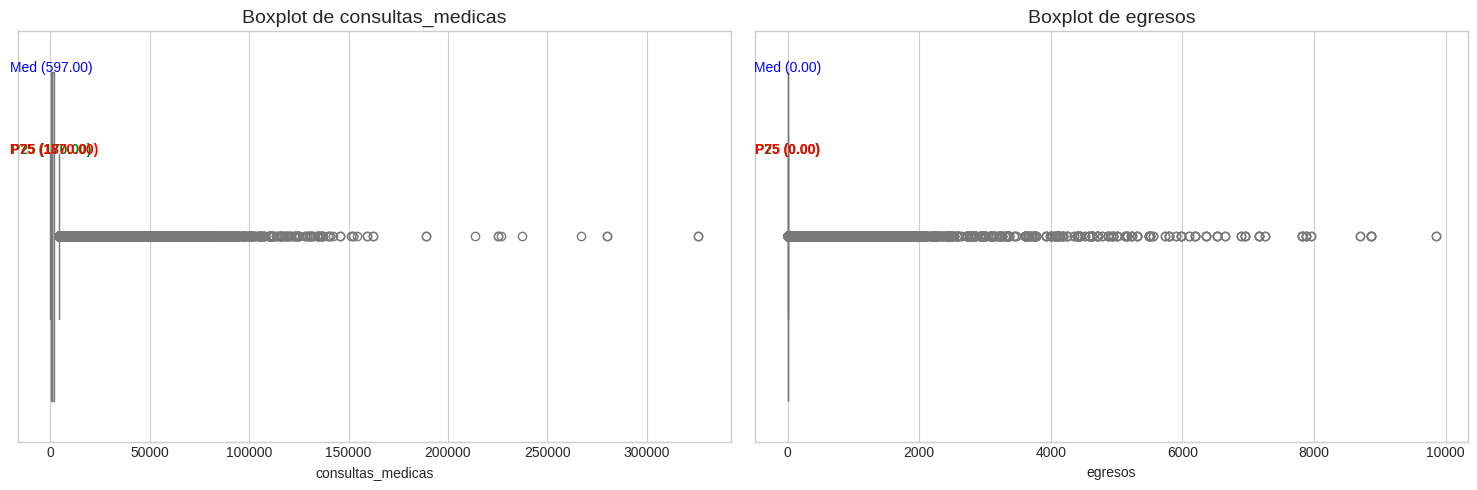

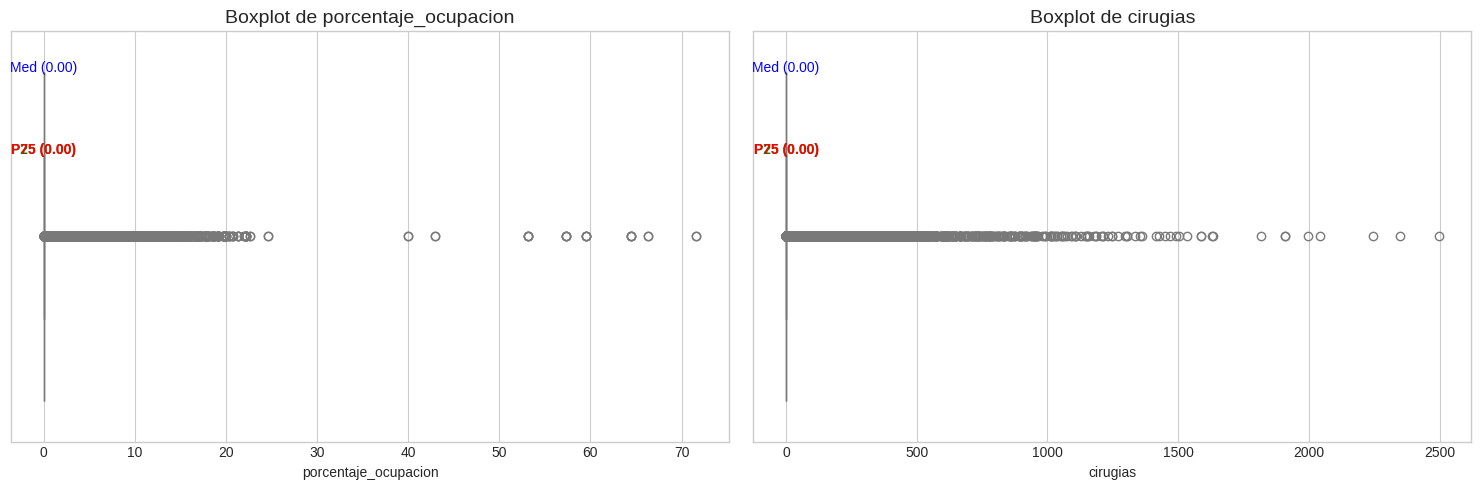

In [ ]:
# Boxplots

# La lista de variables que deseas graficar
# vars_interes = ['consultas_medicas', 'egresos', 'porcentaje_ocupacion', 'cirugias']

# --- Configuración para mostrar en pares ---
n_vars = len(vars_interes)
# Calcula el número total de figuras necesarias (pares: 4 variables / 2 = 2 figuras)
n_filas = (n_vars + 1) // 2

for i in range(n_filas):
    # Crear una nueva figura para los dos subplots (1 fila, 2 columnas)
    plt.figure(figsize=(15, 5)) # Se aumenta el tamaño para acomodar dos gráficos

    # Iterar sobre las dos posiciones dentro de la figura (j=0 para el primer gráfico, j=1 para el segundo)
    for j in range(2):
        # Calcular el índice de la variable dentro de la lista completa (0, 1, 2, 3)
        idx_var = i * 2 + j

        # Si el índice excede el número de variables, sal del bucle
        if idx_var >= n_vars:
            break

        v = vars_interes[idx_var]

        # 1. Crear el subplot en la posición j+1
        # (1 fila, 2 columnas, posición 1 o 2)
        plt.subplot(1, 2, j + 1)

        # 2. Generar el Boxplot
        # Es fundamental que df[v] exista y sea numérico para que el boxplot funcione
        sns.boxplot(x=df[v], color='lightblue')
        plt.title(f"Boxplot de {v}", fontsize=14)
        plt.xlabel(v)

        # 3. Calcular y mostrar los percentiles 25 y 75
        try:
            # Estos son los cuartiles (Q1 y Q3)
            q1 = df[v].quantile(0.25)
            q3 = df[v].quantile(0.75)
            mediana = df[v].median()

            # Añadir las etiquetas de texto sobre el gráfico
            # Las coordenadas Y (-0.2, -0.4) son una estimación para gráficos horizontales simples.
            plt.text(q1, -0.2, f'P25 ({q1:.2f})', horizontalalignment='center',
                     color='green', weight='bold')
            plt.text(q3, -0.2, f'P75 ({q3:.2f})', horizontalalignment='center',
                     color='red', weight='bold')
            plt.text(mediana, -0.4, f'Med ({mediana:.2f})', horizontalalignment='center',
                     color='blue')
        except Exception:
            # Manejar el caso si la columna no es numérica o está vacía
            pass


    # Ajustar el espacio entre los subplots y mostrar la figura
    plt.tight_layout()
    plt.show()

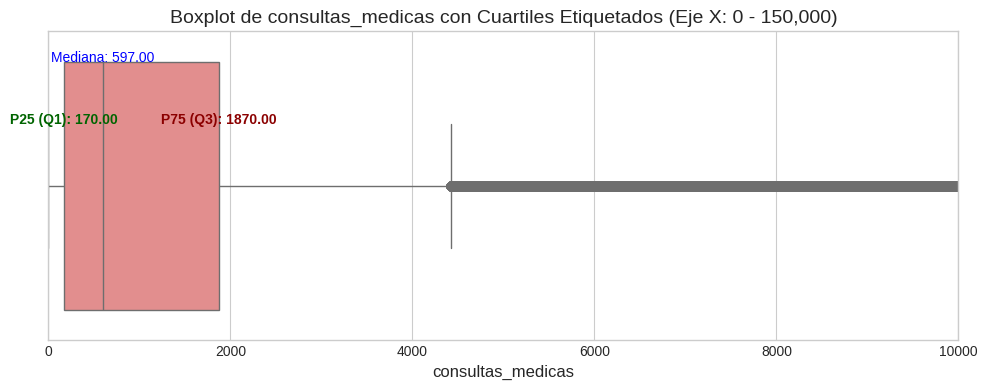

In [ ]:
# La variable de interés
variable = 'consultas_medicas'

# 1. Configurar la figura
plt.figure(figsize=(10, 4))

# 2. Generar el Boxplot
sns.boxplot(x=df[variable], color='lightcoral')
plt.title(f"Boxplot de {variable} con Cuartiles Etiquetados (Eje X: 0 - 150,000)", fontsize=14)
plt.xlabel(variable, fontsize=12)

# 3. Establecer el límite del eje X al rango deseado
plt.xlim(0, 10000)

# 4. Calcular los percentiles (cuartiles)
try:
    q1 = df[variable].quantile(0.25)
    q3 = df[variable].quantile(0.75)
    mediana = df[variable].median()

    # 5. Añadir las etiquetas de texto sobre el gráfico
    # Las etiquetas solo serán visibles si sus valores caen dentro del rango [0, 150000].

    # Percentil 25 (Q1)
    if 0 <= q1 <= 150000:
        plt.text(q1, -0.2, f'P25 (Q1): {q1:.2f}', horizontalalignment='center',
                 color='darkgreen', weight='bold', fontsize=10)

    # Percentil 75 (Q3)
    if 0 <= q3 <= 150000:
        plt.text(q3, -0.2, f'P75 (Q3): {q3:.2f}', horizontalalignment='center',
                 color='darkred', weight='bold', fontsize=10)

    # Mediana
    if 0 <= mediana <= 150000:
        plt.text(mediana, -0.4, f'Mediana: {mediana:.2f}', horizontalalignment='center',
                 color='blue', fontsize=10)

except Exception as e:
    print(f"⚠️ Error al calcular o etiquetar percentiles: {e}")

# 6. Mostrar el gráfico
plt.tight_layout()
plt.show()

# 🔗 Etapa 5 — Correlaciones



In [ ]:
# 1. Calcula la matriz de correlación
corr = df.corr(numeric_only=True)

# 2. Identifica las correlaciones fuertes (>|0.8|)
umbral = 0.8
# Se usa corr.abs() para manejar correlaciones positivas y negativas fuertes.
# Se excluye corr.abs() < 1 para no incluir la correlación de una variable consigo misma.
fuertes = corr[(corr.abs() > umbral) & (corr.abs() < 1)]

# 3. Limpia la matriz 'fuertes' para obtener solo las columnas relevantes
#    - Elimina filas que son completamente NaN (no tienen correlaciones fuertes con nadie).
#    - Elimina columnas que son completamente NaN (no tienen correlaciones fuertes con nadie).
#    - El resultado será una matriz más pequeña que contiene las variables involucradas.
variables_fuertes = fuertes.dropna(how='all', axis=0).index
matriz_reducida = corr.loc[variables_fuertes, variables_fuertes]

# ---------------------------------------------------------------------
# PARTE A: Muestra la tabla de correlaciones fuertes
# ---------------------------------------------------------------------
print("\n🔍 Correlaciones fuertes (>|0.8|) en formato tabla:")
display(fuertes.dropna(how='all', axis=0).dropna(how='all', axis=1))





🔍 Correlaciones fuertes (>|0.8|) en formato tabla:


,anio,municipio_id,consultas_medicas,egresos,dias_camas_disponible,promedio_camas_disponibles,pacientes_dias,dias_estadia,defunciones,urgencias,cirugias,medicos,enfermeros
anio,NaN,-0.80959,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
municipio_id,-0.80959,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
consultas_medicas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.869594,NaN,0.954061,0.942580
egresos,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.806556,NaN,0.937962,NaN,NaN
dias_camas_disponible,NaN,NaN,NaN,NaN,NaN,0.996275,0.973212,0.925497,NaN,NaN,NaN,NaN,NaN
promedio_camas_disponibles,NaN,NaN,NaN,NaN,0.996275,NaN,0.970004,0.922475,NaN,NaN,NaN,NaN,NaN
pacientes_dias,NaN,NaN,NaN,NaN,0.973212,0.970004,NaN,0.932313,NaN,NaN,NaN,NaN,NaN
dias_estadia,NaN,NaN,NaN,NaN,0.925497,0.922475,0.932313,NaN,NaN,NaN,NaN,NaN,NaN
defunciones,NaN,NaN,NaN,0.806556,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
urgencias,NaN,NaN,0.869594,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.930129,0.928031


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) Liberation Sans.
  fig.canvas.print_figure(bytes_io, **kw)


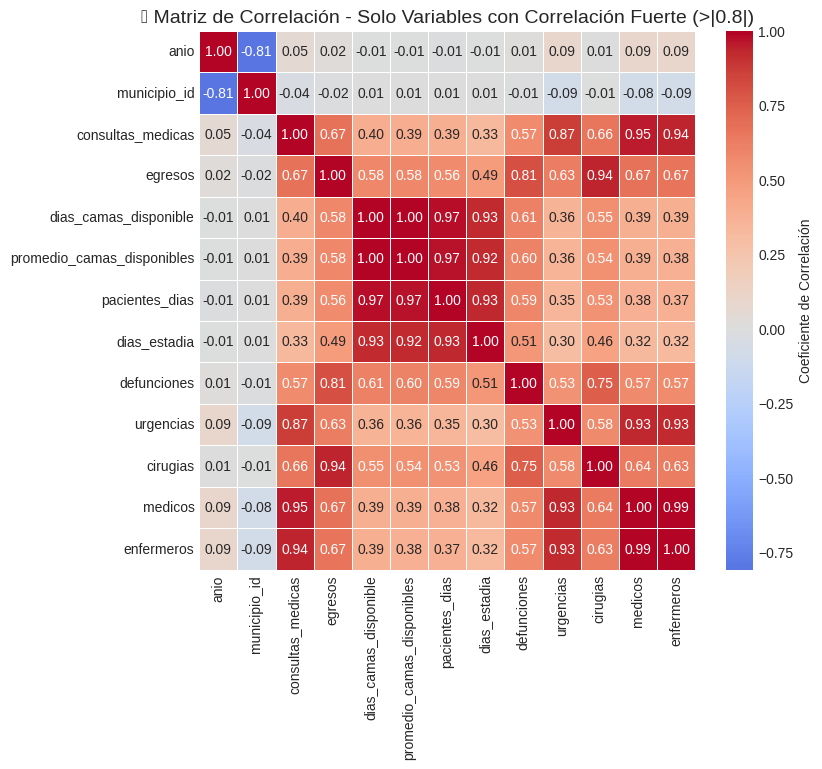

In [ ]:
# ---------------------------------------------------------------------
# PARTE B: Muestra el HEATMAP REDUCIDO
# ---------------------------------------------------------------------
if not matriz_reducida.empty:
    plt.figure(figsize=(8, 7)) # Tamaño ajustado para menos variables
    sns.heatmap(
        matriz_reducida,
        annot=True,              # Mostrar el valor de la correlación
        fmt=".2f",               # Formato de dos decimales
        cmap="coolwarm",
        center=0,
        linewidths=.5,           # Añadir líneas para mejor visualización
        cbar_kws={'label': 'Coeficiente de Correlación'}
    )
    plt.title("🔥 Matriz de Correlación - Solo Variables con Correlación Fuerte (>|0.8|)", fontsize=14)
    plt.show()
else:
    print("\n⚠️ No se encontraron variables con correlaciones fuertes (mayor a |0.8|).")

# 📋 Conclusiones EDA Parte 1

## 1. Consultas Médicas
Esta variable muestra una distribución altamente sesgada a la derecha y presenta valores atípicos (outliers) extremos:

- Asimetría: La media (2134.9) es significativamente mayor que la mediana (50% = 597.0). Esto indica que la mayoría de los valores se concentran en el rango bajo, y que hay valores altos que tiran de la media hacia arriba.

- Dispersión y Outliers: La desviación estándar (std = 5452.4) es mucho más grande que la media. El valor máximo (325,878) es extremadamente alto en comparación con el 75º percentil (1870), confirmando la presencia de outliers muy grandes.

- Concentración: El 75% de los datos está por debajo de 1870, mientras que el valor máximo es 325,878.

## 2. Egresos, Porcentaje de Ocupación, y Cirugías
Estas tres variables comparten un patrón de extrema concentración en cero y una asimetría muy marcada, lo que sugiere que la mayoría de las entidades o periodos reportan ninguna actividad en estos rubros.

- Concentración en Cero: Para las tres variables, los percentiles 25%, 50% (mediana) y 75% son 0.0. Esto significa que al menos el 75% de las observaciones tienen un valor de cero.

- Asimetría y Outliers: A pesar de que la gran mayoría de los datos son cero, el valor máximo para las tres es muy alto (egresos: 9847, porcentaje_ocupacion: 82.35, cirugias: 2497).
La media es mayor que la mediana (que es 0), lo que confirma que el pequeño porcentaje de valores positivos son grandes y sesgan la distribución.

- Interpretación: La distribución es de tipo "casi binario" o "Poisson inflada de ceros" (Zero-Inflated), donde la mayoría de los casos no tienen egresos, ocupación o cirugías, pero una minoría tiene valores significativos.

## 3. Correlaciones
- Se observan correlaciones altas entre:
  - `consultas_medicas` con `urgencias`,`medicos` y `enfermeros`
  - `camas` con `quirofanos`
  - `egresos` con `cirugias` y `defunciones`





# Conclusiones sobre la Viabilidad

Dadas las características obtenidas del análisis exploratorio (basado en la tabla de estadísticas descriptivas), el uso del dataset es viable, pero requerirá un preprocesamiento intensivo para abordar los problemas de asimetría, la alta concentración en cero y los outliers.

Conclusiones sobre la Viabilidad
1. Desafíos Principales (Riesgos)
Las principales características que complican el desarrollo de modelos predictivos son la extrema asimetría y la inflación de ceros:

    - Asimetría Extrema y Outliers (consultas_medicas): La diferencia abrumadora entre la media y la mediana, sumada al valor máximo (325,878), significa que los modelos lineales (como la regresión lineal tradicional) tendrían un rendimiento muy pobre, ya que son sensibles a estos valores extremos.

    - Inflación de Ceros (egresos, porcentaje_ocupacion, cirugías): El hecho de que el 75% o más de las observaciones sean cero es el desafío más grande. Un modelo predictivo estándar (como la regresión de Poisson) no funcionará bien porque está diseñado para datos donde los ceros son raros o aleatorios.

    - Distribución No Normal: Ninguna de las variables sigue una distribución normal o aproximadamente normal, lo que descarta el uso directo de muchos modelos paramétricos.